In [1]:
# from https://mccormickml.com/2019/07/22/BERT-fine-tuning/#introduction
# The Corpus of Linguistic Acceptability (CoLA)

# Johannes Siedersleben
# QAware GmbH, Munich
# 10.2.2021

In [2]:
# Python imports

from time import perf_counter
import pickle

# neural metworks support: torch, sklearn metrics
import torch
from torch import Tensor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# utilities for display
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def showProgress(protocol):
    plt.plot(protocol[1], label='training loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.show()

In [4]:
def showConfusionMatrix(labels, predictions: Tensor, names: list) -> None:
    """
    @param labels: tensor of labels
    @param predictions: tensor of prediction
    @param names: names of categories, e.g. ['correct', 'incorrect']
    @return: None
    The confusion matrix is a K x K matrix with K = number of categories
    """

    cm = confusion_matrix(labels, predictions)
    vmax = cm.max()   # number of categories
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=names, yticklabels=names, vmin=0, vmax=vmax, cmap="YlGnBu")
    plt.xlabel = ('true label')
    plt.ylabel = ('predicted label')
    plt.show()

## Playing with Confusion

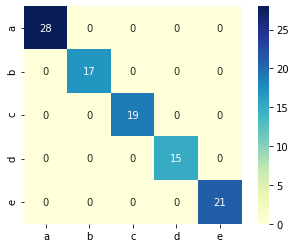

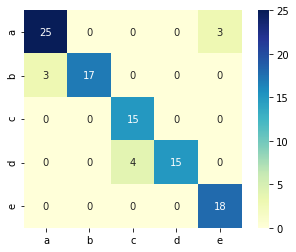

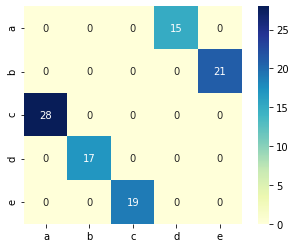

In [5]:
labels = torch.randint(5, (100, 1))  # 100 random ints in [0, 5)
cat_names = ['a', 'b', 'c', 'd', 'e']
no_errors = labels.clone()

some_errors = no_errors.clone()
some_errors[range(0, 100, 10)] = (some_errors[range(0, 100, 10)] + 1) % 5

all_wrong = no_errors.clone()
all_wrong[:] = (all_wrong[:] + 2) % 5

showConfusionMatrix(labels, no_errors, cat_names)
showConfusionMatrix(labels, some_errors, cat_names)
showConfusionMatrix(labels, all_wrong, cat_names)

See https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
for a complete library and an exhaustive documentation.

In [6]:
def showMetrics(labels, predictions: Tensor) -> None:
    """"
    @param labels: tensor of labels
    @param predictions: tensor of prediction
    @return: None
    This functions prints accuracy, precision, recall and f1
    """
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)

    print(f'\naccuracy  = {accuracy:.3f}\n'
          f'precision = {precision:.3f}\n'
          f'recall    = {recall:.3f}\n'
          f'f1        = {f1:.3f}')

## Playing with Metrics

In [7]:
labels = torch.randint(2, (100, 1))  # 100 random ints in [0, 2)
no_errors = labels.clone()

some_errors = no_errors.clone()
some_errors[range(0, 100, 10)] = 1 - some_errors[range(0, 100, 10)]

all_wrong = no_errors.clone()
all_wrong[:] = 1 - all_wrong[:]

showMetrics(labels, no_errors)
showMetrics(labels, some_errors)
showMetrics(labels, all_wrong)


accuracy  = 1.000
precision = 1.000
recall    = 1.000
f1        = 1.000

accuracy  = 0.900
precision = 0.891
recall    = 0.925
f1        = 0.907

accuracy  = 0.000
precision = 0.000
recall    = 0.000
f1        = 0.000


## How did BERT do?

In [8]:
log_file = 'log_000.pickle'
with open(log_file, 'rb') as log:
    log_object = pickle.load(log)

cfg, protocol, \
train_labels, train_predictions, \
test_labels, test_predictions = log_object

# show the outcome
print(f"\ntotal number of labels:         {len(train_labels)}\n"
      f"total number of correct labels: {len(list(filter(lambda x: x == 1, train_labels)))}")

starttime = protocol[0][0]
print(f'\n\ntimestamp\tinfo\n')
for timestamp, info in protocol[:50]:
    print(f'{timestamp - starttime:.6f}\t{info}')


total number of labels:         80
total number of correct labels: 62


timestamp	info

0.000000	epoch 0
0.757792	1.1306153535842896
3.523733	0.8303014636039734
6.152942	0.6700848340988159
8.693336	0.6036989092826843
11.325905	0.5025121569633484
13.556174	0.5427989959716797
15.583446	0.6387192606925964
17.598965	0.555924117565155
19.557359	0.5963043570518494
21.631215	0.6865864992141724
23.189171	epoch 1
23.745120	0.905249834060669
25.750741	0.597873866558075
27.857765	0.43510544300079346
29.898363	0.7558364868164062
31.886351	0.25520145893096924
33.930480	0.2938888967037201
36.026314	0.5315675139427185
38.225020	0.6027042865753174
40.307261	0.5415557026863098
42.480442	0.5286444425582886
44.196602	epoch 2
44.855798	0.7201305031776428
46.917102	0.25827470421791077
48.857375	0.5513792037963867
50.885776	0.2510875463485718
53.097446	0.5198581218719482
55.072182	0.5315513610839844
57.042145	0.3856835961341858
59.102856	0.7132172584533691
61.007822	0.6270365118980408
62.977316	0.665826380

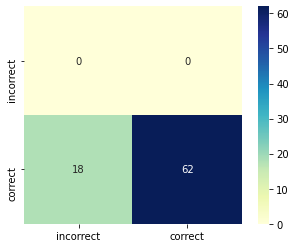

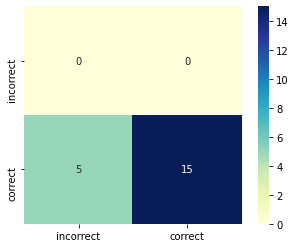

In [9]:
cat_names = ['incorrect', 'correct']
showConfusionMatrix(train_labels, train_predictions, cat_names)
showConfusionMatrix(test_labels, test_predictions, cat_names)

In [10]:
showMetrics(train_labels, train_predictions)
showMetrics(test_labels, test_predictions)


accuracy  = 0.775
precision = 0.775
recall    = 1.000
f1        = 0.873

accuracy  = 0.750
precision = 0.750
recall    = 1.000
f1        = 0.857
